# Brazilian Securities

---

### Wilson Freitas


# Brazilian Securities

---

### Wilson Freitas

# Lecture 4

- DI x IPCA Spread Futures - DAP
    - DI x IPCA Spread Curve
- Ibovespa Futures - IND
	- DI x Ibovespa Spread Curve
- Commodities Futures
	- Cash Settled Live Cattle Futures - BGI
	- Cash Settled Corn Futures - CCM
- Debêntures
	- Fixed Rate
	- Floating Rate: CDI+spread, %CDI
	- Indexed: IPCA


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bcb import currency, sgs
import bizdays

MARKET_CALENDAR = bizdays.Calendar.load('ANBIMA.cal')
ACTUAL_CALENDAR = bizdays.Calendar(name='actual')

import myfuncs as my

In [3]:
df = pd.read_parquet('data/contracts_202109_202111.parquet').reset_index(drop=True)

## DI x IPCA Spread Futures


- This is an interest rate future on the spread between the **compounded DI rate** and **IPCA variation**.
    - It is the **real interest rate**, as DI rates are nominal rates.
    - IPCA is an inflation index published by IBGE.
- The future is called **DAP** Future.


### Real Interest Rates


$$
\left( 1 + c(t,T) \right)^{DU(t,T)/252} = \frac{\Pi_{i=t}^{T}(1 + CDI_i)^{1/252}}{\frac{IPCA_{T}}{IPCA_{t}}}
$$

where

- $c(t,T)$ is an interest rate - spread between DI1 rates and inflation.
- $DU(t,T)$ is the total number of business days between $t$ e $T$.
- $IPCA_{t}$ the IPCA at $t$
- $IPCA_{T}$ the IPCA expectation at $T$

### Pricing

- The DAP Futures are priced as bullet bonds.
- $c(t,T)$ is the real interest rate

$$
PU_{DAP}(t,T) = \frac{100000}{(1 + c(t,T))^{DU(t,T)/252}}
$$

where

- $t$: current instant of time (reference date)
- $T$: maturity date (date when the contract expires)
- $DU(t,T)$: the amount of business days between maturity and reference dates, according to specific calendar delivered by ANBIMA
- $c(t,T)$: spot interest rate between reference date and contract maturity

In [4]:
dap_curve = my.build_curve('DAP', df, refdate=pd.to_datetime('2021-11-01'),
                           cal=MARKET_CALENDAR, notional=100000)

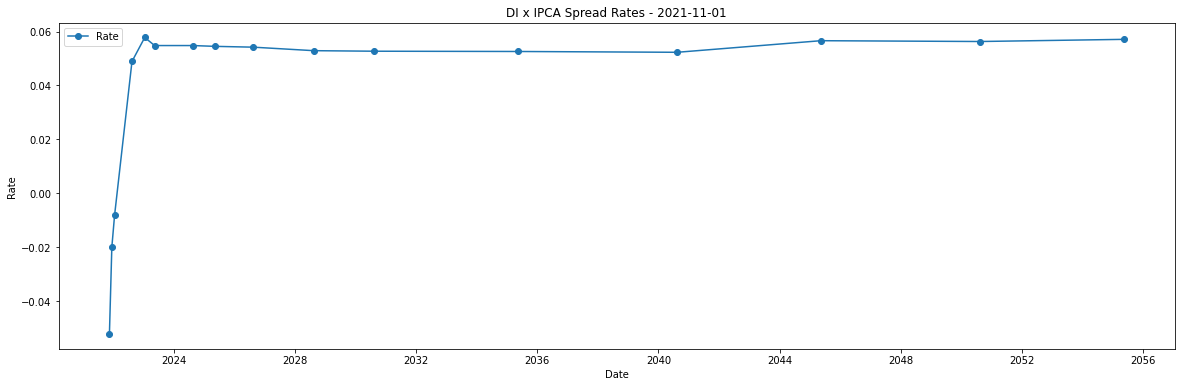

In [5]:
curve = dap_curve()
curve.plot(x='Maturity', y='Rate', figsize=(20,6), style='-o',
           ylabel='Rate', xlabel='Date', title='DI x IPCA Spread Rates - 2021-11-01');

- Let's compare with the real interest rates obtained from NTN-B contracts

In [6]:
# ANBIMA's parameters for real interest rates
par = (0.0557, -0.0766, 0.1308, -0.0326, 2.0284, 1.0558)
ipca_gov_curve = my.nss_curve(par)
ipca_gov_rates = ipca_gov_curve(curve['DU'])

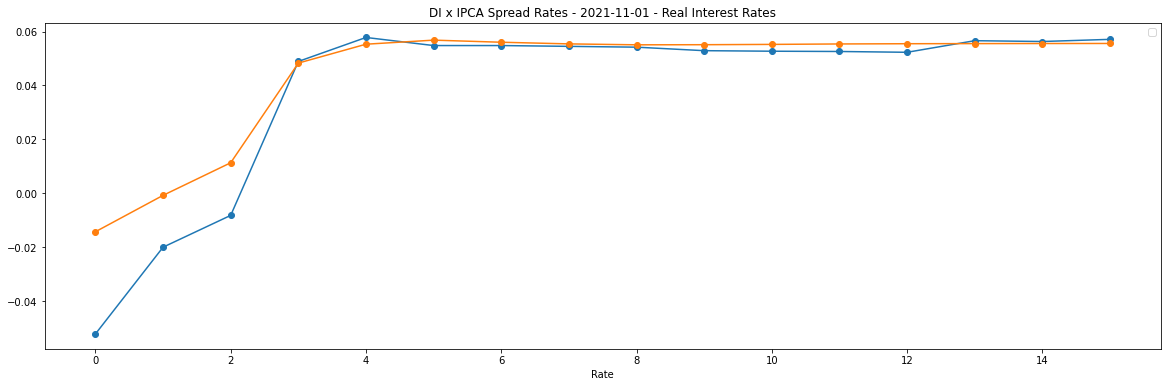

In [7]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xlabel('Rate')
ax.set_title('DI x IPCA Spread Rates - 2021-11-01 - Real Interest Rates')
ax.legend(['DAP rates', 'IPCA gov rates'])
ax.plot(curve['Rate'], '-o')
ax.plot(ipca_gov_rates, '-o')
fig.show()

## Ibovespa Futures - IND

- This trades the future values of Ibovespa Index.


### Pricing

- From arbitrage theory the future price of Ibovespa can be written as

$$
PU_{IND}(T) = S_{t} \frac{( 1 + r(t,T) )^{DU(t,T)/252}}{(1 + c(t,T)) ^ {DU(t,T)/252}}
$$

where

- $t$: current instant of time (reference date)
- $T$: maturity date (date when the contract expires)
- $S_{t}$ the spot value at $t$
- $PU_{IND}(T)$ the future value of Ibovespa at $T$
- $DU(t,T)$: the total number of business days between $t$ e $T$
- $c(t,T)$: spot interest rate between reference date and contract maturity
- $r(t,T)$: risk free interest rate (DI1 Futures rates)

### Ibovespa Spread Rates

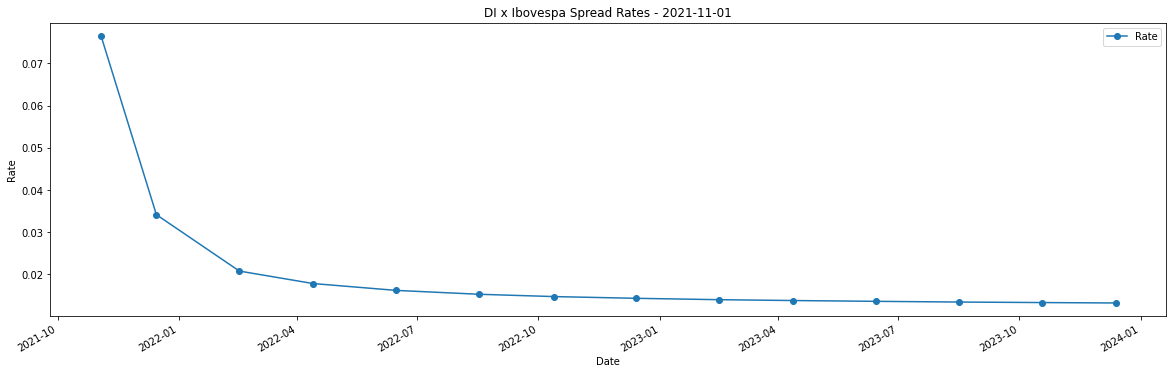

In [8]:
di1_curve = my.build_curve('DI1', df, refdate=pd.to_datetime('2021-11-01'),
                           cal=MARKET_CALENDAR, notional=100000)
ind_curve = my.build_curve('IND', df, refdate=pd.to_datetime('2021-11-01'),
                           cal=MARKET_CALENDAR, spot=105822, rf_curve=di1_curve)

ind_curve().plot(x='Maturity', y='Rate', figsize=(20,6), style='-o',
               ylabel='Rate', xlabel='Date', title='DI x Ibovespa Spread Rates - 2021-11-01');

- https://arquivos.b3.com.br/Web/Consolidated?lang=en
- [Economic Indicators](https://arquivos.b3.com.br/tabelas/EconomicIndicatorPrice/2021-11-30?lang=en)

## Boi Gordo Commodity Futures - BGI (Live Cattle Futures)

- This trades the future values of male steers (Boi Gordo).
    - Male steers with at least 16 net arrobas carcass weight and a maximum age of 42 months.


### Risk Factors

- B3 CORE Risk Engine considers the future prices itself as risk factors for Boi Gordo Futures.

### Pricing

- Alternatively, from arbitrage theory the future price of Boi Gordo can be written as

$$
PU_{BGI}(T) = S_{t} \frac{( 1 + r(t,T) )^{DU(t,T)/252}}{(1 + c(t,T)) ^ {DU(t,T)/252}}
$$

where

- $t$: current instant of time (reference date)
- $T$: maturity date (date when the contract expires)
- $S_{t}$ the spot value at $t$
- $PU_{BGI}(T)$ the future value of Boi Gordo at $T$
- $DU(t,T)$: the total number of business days between $t$ e $T$
- $c(t,T)$: spot interest rate between reference date and contract maturity
- $r(t,T)$: risk free interest rate (DI1 Futures rates)

### BGI Futures Prices

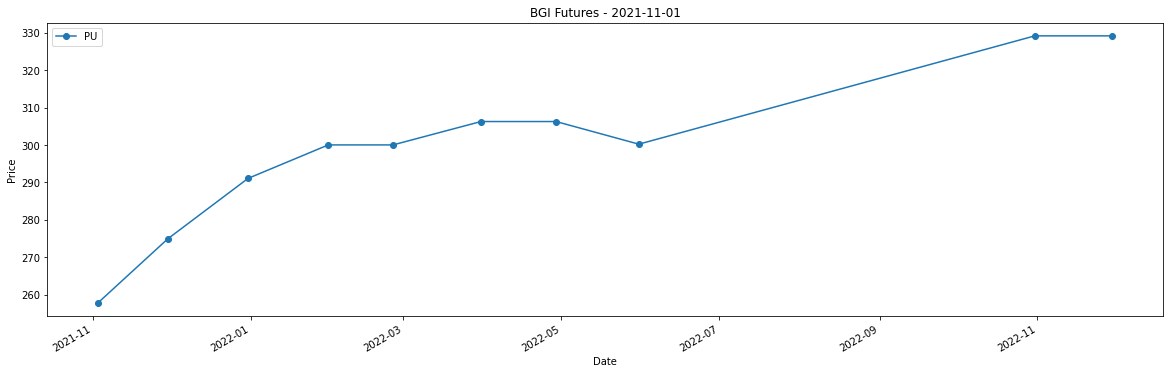

In [9]:
bgi_fut = my.build_bgi_futures(df, cal=MARKET_CALENDAR, refdate=pd.to_datetime('2021-11-01'),
                               spot=257.77)

bgi_fut.plot(x='Maturity', y='PU', figsize=(20,6), style='-o',
             ylabel='Price', xlabel='Date', title='BGI Futures - 2021-11-01');

- [Indicadores agropecuários
](https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-de-derivativos/indicadores/indicadores-agropecuarios/)

### BGI Futures Cost of Carry Rates

In [10]:
bgi_curve = my.build_curve('BGI', df, refdate=pd.to_datetime('2021-11-01'),
                           cal=MARKET_CALENDAR, spot=257.77, rf_curve=di1_curve)

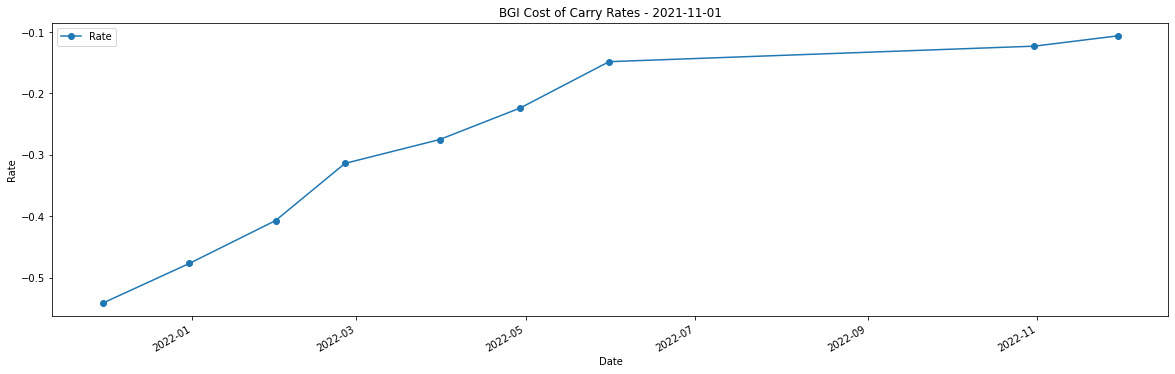

In [11]:
bgi_curve().plot(x='Maturity', y='Rate', figsize=(20,6), style='-o',
               ylabel='Rate', xlabel='Date', title='BGI Cost of Carry Rates - 2021-11-01');

### BGI implied Cost of Carry

- Commodities have additional costs, such as storage costs, for example.

- These costs are taken into account when dealing with futures.

- In a risk free world the future value of a commodity can be given by:

$$
S_t ( 1 + r(t,T) )^{DU(t,T)/252}
$$

- Considering the storage costs is known and has a present value $U$, the future value can be defined such that

$$
(S_t + U) ( 1 + r(t,T) )^{DU(t,T)/252}
$$

- $U$ can be estimated from the future prices, following the above equation.

In [36]:
# U for BGI Futures
bgi_fut['U'] = bgi_fut['PU'] / ( (1 + di1_curve(bgi_fut['DU'])['Rate']) ** (bgi_fut['DU']/252) ) - 257.77
bgi_fut

,DataRef,Maturity,DU,DC,PU,U
0,2021-11-01,2021-11-03,1,2,257.77,-0.075392
1,2021-11-01,2021-11-30,19,29,274.90,15.602552
2,2021-11-01,2021-12-31,42,60,291.05,29.408951
3,2021-11-01,2022-01-31,63,91,300.00,36.004676
4,2021-11-01,2022-02-25,82,116,300.00,33.633674
5,2021-11-01,2022-03-31,104,150,306.25,36.629114
6,2021-11-01,2022-04-29,123,179,306.25,33.938555
7,2021-11-01,2022-05-31,145,211,300.20,24.945678
8,2021-11-01,2022-10-31,251,364,329.15,36.010623
9,2021-11-01,2022-11-30,271,394,329.15,33.097832


- $U$ is positive, indicating value that must be paid.
    - Negative values of $U$, as happens in IND futures, represent received values for the asset owner.

- $U$ can be writen in terms of $S_t$ and as a constant rate $c(t,T)$.

$$
S_{t} \frac{( 1 + r(t,T) )^{DU(t,T)/252}}{(1 + c(t,T)) ^ {DU(t,T)/252}}
$$

- Positive values of $U$ yield negative values for $c(t,T)$ (BGI futures for example).
- Negative values of $U$ yield positive values for $c(t,T)$ (IND futures for example).

In [35]:
# U for IND Futures
ind_fut = my.build_ind_futures(df, refdate=pd.to_datetime('2021-11-01'),
                           cal=MARKET_CALENDAR, spot=105822)
ind_fut['U'] = ind_fut['PU'] / ( (1 + di1_curve(ind_fut['DU'])['Rate']) ** (ind_fut['DU']/252) ) - 105822
ind_fut

,DataRef,Maturity,DU,DC,PU,U
0,2021-11-01,2021-11-03,1,2,105822.0,-30.950523
1,2021-11-01,2021-12-15,30,44,106383.0,-422.229627
2,2021-11-01,2022-02-16,75,107,107953.0,-646.159276
3,2021-11-01,2022-04-13,113,163,109688.0,-835.631960
4,2021-11-01,2022-06-15,156,226,111874.0,-1048.608267
5,2021-11-01,2022-08-17,200,289,114166.0,-1267.421053
6,2021-11-01,2022-10-13,239,346,116233.0,-1459.424077
7,2021-11-01,2022-12-14,281,408,118453.0,-1667.153391
8,2021-11-01,2023-02-15,326,471,120819.0,-1888.515135
9,2021-11-01,2023-04-12,363,527,122780.0,-2070.921647


## Corn Futures - CCM

- This trades the future values of yellow corn in bulk.
    - Yellow corn in bulk, with regular odor and appearance, hard or semihard from the latest crop.

### Risk Factors

- B3 CORE Risk Engine considers the future prices itself as risk factors for Corn Futures.


### Pricing

- Alternatively, from arbitrage theory the future price of Corn Futures can be written as

$$
PU_{CCM}(T) = S_{t} \frac{( 1 + r(t,T) )^{DU(t,T)/252}}{(1 + c(t,T)) ^ {DU(t,T)/252}}
$$

where

- $t$: current instant of time (reference date)
- $T$: maturity date (date when the contract expires)
- $S_{t}$ the spot value at $t$
- $PU_{CCM}(T)$ the future value of Corn at $T$
- $DU(t,T)$: the total number of business days between $t$ e $T$
- $c(t,T)$: spot interest rate between reference date and contract maturity
- $r(t,T)$: risk free interest rate (DI1 Futures rates)

### CCM Futures Prices

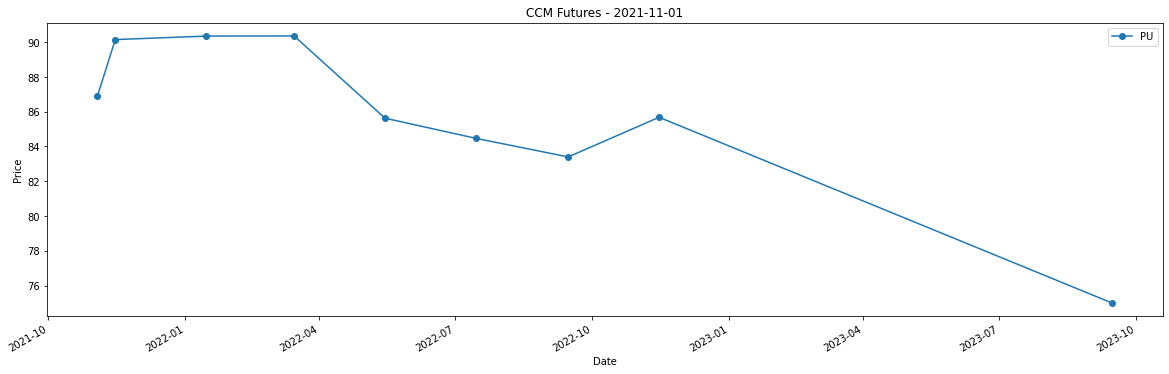

In [12]:
ccm_fut = my.build_ccm_futures(df, cal=MARKET_CALENDAR, refdate=pd.to_datetime('2021-11-01'),
                               spot=86.9)

ccm_fut.plot(x='Maturity', y='PU', figsize=(20,6), style='-o',
             ylabel='Price', xlabel='Date', title='CCM Futures - 2021-11-01');

- [Indicadores agropecuários
](https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-de-derivativos/indicadores/indicadores-agropecuarios/)

### CCM Futures Cost of Carry Rates

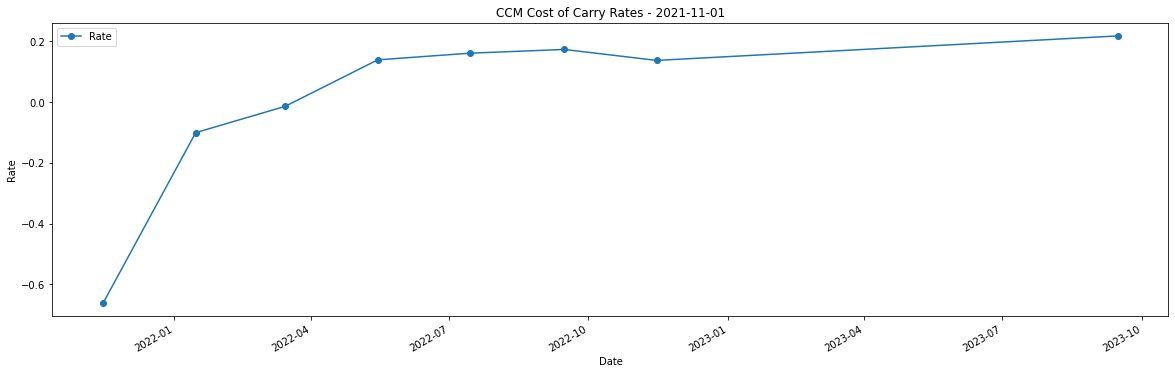

In [13]:
ccm_curve = my.build_curve('CCM', df, refdate=pd.to_datetime('2021-11-01'), cal=MARKET_CALENDAR,
                           spot=86.9, rf_curve=di1_curve)

ccm_curve().plot(x='Maturity', y='Rate', figsize=(20,6), style='-o',
               ylabel='Rate', xlabel='Date', title='CCM Cost of Carry Rates - 2021-11-01');

# Debêntures

* Debêntures are fixed income instruments issued by companies

* Commonly indexed by
  * Fixed rate
  * Floating (DI rates) + *spread*
  * Floating %CDI
  * IPCA inflation index

## Data

* [CALC B3](https://calculadorarendafixa.com.br/#/navbar/calculadora)

* [ANBIMA|Data](https://data.anbima.com.br/)
    
* [ANBIMA|Prices](https://www.anbima.com.br/pt_br/informar/taxas-de-debentures.htm)

### Overview

- Generic cashflow for any bond that pays coupons

![](images/fluxo-de-caixa-debenture-simples1.png)


### Overview

- Generic cashflow for any bond that pays coupons and has amortizations

![](images/fluxo-de-caixa-debenture-com-amort.png)

- Once you have these future payments the price is obtained by discounting the cashflows with a discount curve and a spread.
- But first, how to calculate the cashflows?


### VNR - Remaining Notional Value

- After an amortization is paid, the amount of notional value that remains unpaid is the $VNR$

- At the begining $VNR$ is equal to the notional amount $N$

$$
VNR_0 = N
$$

- After the first amortization we have

$$
VNR_1 = N - A_1
$$

- After $n$ amortizations

$$
VNR_n = N - \sum^n_{i=1} A_i
$$

- After amortizations the coupons are calculated on $VNR_i$

In [14]:
from abc import ABC, abstractmethod

def vna_ipca(start_date, end_date):
    freq = '1M'
    b_dates = pd.date_range(start=start_date, end=end_date, freq=freq, closed=None).to_series()
    refdates = b_dates - pd.DateOffset(months=1)
    b_dates = b_dates.map(lambda dt: dt.replace(day=15))
    refdates = refdates.map(lambda dt: dt.replace(day=1))

    dates = pd.DataFrame({
        'RefDate': refdates,
        'BirthDate': b_dates,
        'BirthDateBefore': b_dates.shift()
    }).reset_index(drop=True)

    ipca = sgs.get(('IPCA', 433))

    VNA = pd.merge(dates, ipca, left_on='RefDate', right_on='date')
    VNA['VNA'] = 1 + VNA['IPCA']/100
    VNA.loc[0, 'VNA'] = 1000
    VNA['VNA'] = np.cumprod(VNA['VNA'])

    return VNA[['BirthDate', 'VNA']].rename(columns={'BirthDate': 'Date'})


class Debenture(ABC):
    def __init__(self, **bond_details):
        self.issuer = bond_details['issuer']
        self.symbol = bond_details['codbond']
        self.issue_date = pd.to_datetime(bond_details['issuedate'])
        self.start_date = pd.to_datetime(bond_details['startingdate'])
        self.maturity_date = pd.to_datetime(bond_details['expiredate'])
        self.type = bond_details['method']
        self.coupon_rate = bond_details['yield']/100
        self.calendar = bond_details['calendar']
        self.vne = bond_details['vne']
        self.anniversary = bond_details['anniversaryday']
        self._cashflow = self._build_cashflow(bond_details['events'])
        self.amortization_cashflow = self._build_amortization_cashflow(self._cashflow)
        self.coupon_cashflow = self._build_coupon_cashflow(self._cashflow)
        self.cashflow = self._build_bond_cashflow()

    def _build_cashflow(self, events):
        cashflow = pd.DataFrame(events)
        cashflow = cashflow.rename(columns={'date': 'Dates'})
        cashflow['Dates'] = pd.to_datetime(cashflow['Dates'])
        return cashflow.sort_values('Dates').reset_index(drop=True)

    def _build_amortization_cashflow(self, cashflow):
        amortization_cashflow = cashflow\
            .query('eventType != "J"')\
            .rename(columns={'yield': 'Amortization_p'})\
            .assign(Amortization_p=lambda df: df['Amortization_p']/100)\
            .reset_index(drop=True)
        
        cmp = 1 - amortization_cashflow['Amortization_p'].sum()
        sqs = [amortization_cashflow, pd.DataFrame({'Dates': self.maturity_date, 'Amortization_p': [cmp]})]
        amortization_cashflow = pd.concat(sqs, axis=0).reset_index(drop=True)
        amortization_cashflow['Dates'] = pd.to_datetime(amortization_cashflow['Dates'])
        
        return amortization_cashflow[['Dates', 'Amortization_p']]

    def _build_coupon_cashflow(self, cashflow):
        coupon_cashflow = cashflow\
            .query('eventType == "J"')\
            .assign(Coupon_p=0)\
            .reset_index(drop=True)
        return coupon_cashflow[['Dates', 'Coupon_p']]

    def _build_bond_cashflow(self):
        bond_cashflow = pd.merge(self.amortization_cashflow, self.coupon_cashflow, on='Dates', how='outer')
        bond_cashflow = bond_cashflow.sort_values('Dates').reset_index(drop=True)
        
        bond_cashflow.loc[np.isnan(bond_cashflow['Amortization_p']), 'Amortization_p'] = 0
        
        bond_cashflow['c_amt_l'] = np.cumsum(bond_cashflow['Amortization_p'])
        bond_cashflow['VNR_p'] = 1 - bond_cashflow['c_amt_l']
        bond_cashflow = bond_cashflow.drop('c_amt_l', 1)
        bond_cashflow['Fixings'] = list(self.calendar.vec.adjust_next(bond_cashflow['Dates']))
        
        dates = pd.to_datetime(pd.concat([pd.Series([self.start_date]), bond_cashflow['Fixings']]))
        bond_cashflow['DaysBetween'] = my.bizdiff(dates, MARKET_CALENDAR)
        
        return bond_cashflow
    
    def market_cashflow(self, refdate, **kwargs):
        market_cashflow = self.cashflow[self.cashflow['Dates'] > refdate].reset_index(drop=True)
        market_cashflow['BusinessDays'] = list(self.calendar.vec.bizdays(refdate, market_cashflow['Fixings']))
        sqs = [market_cashflow['BusinessDays'].head(1), market_cashflow['DaysBetween'].tail(-1)]
        market_cashflow['CouponDays'] = pd.concat(sqs)
        
        self.calculate_notional(refdate, **kwargs)
        
        market_cashflow['VNR'] = self.notional * market_cashflow['VNR_p']
        market_cashflow['Amortizations'] = self.notional * market_cashflow['Amortization_p']

        self.vnr = market_cashflow['VNR'].iloc[0]
        dx = self.cashflow.loc[self.cashflow['Dates'] <= refdate, 'Dates'].iloc[-1]
        self.last_coupon_date = pd.to_datetime(self.calendar.following(dx))
        
        market_cashflow['Coupon_p'] = self.coupon_rates(market_cashflow, **kwargs)
        self.calculate_vna(refdate, **kwargs)
        
        _N = market_cashflow['VNR'].shift(fill_value=self.vna)
        _M = market_cashflow['VNR'].shift(fill_value=self.vnr)
        market_cashflow['Coupons'] = _N * (1 + market_cashflow['Coupon_p']) ** (market_cashflow['CouponDays']/252) - _M
        market_cashflow['Payments'] = market_cashflow['Coupons'] + market_cashflow['Amortizations']

        return market_cashflow
    
    @abstractmethod
    def coupon_rates(self, market_cashflow, **kwargs):
        raise NotImplemented()

    @abstractmethod
    def calculate_vna(self, refdate, **kwargs):
        raise NotImplemented()

    @abstractmethod
    def calculate_notional(self, refdate, **kwargs):
        raise NotImplemented()


class FixedRateDebenture(Debenture):
    def coupon_rates(self, market_cashflow, **kwargs):
        return self.coupon_rate
    
    def calculate_vna(self, refdate, **kwargs):
        du = self.calendar.bizdays(self.last_coupon_date, refdate)
        self.vna = self.vnr * (1 + self.coupon_rate)**(du/252)

    def calculate_notional(self, refdate, **kwargs):
        self.notional = self.vne


class FloatingRateDebenture(Debenture):
    def coupon_rates(self, market_cashflow, **kwargs):
        zero_curve = kwargs['zero_curve']
        z_rate = zero_curve(market_cashflow['BusinessDays'])

        comp1 = (1 + z_rate['Rate']) ** (market_cashflow['BusinessDays']/252)
        comp2 = comp1.shift()
        
        du1 = market_cashflow['BusinessDays']
        du2 = du1.shift()
        
        f_rate = (comp1/comp2) ** (252/(du1 - du2)) - 1
        c_rate = pd.concat([z_rate['Rate'].head(1), f_rate.tail(-1)])

        fc1 = (1 + c_rate)**(market_cashflow['CouponDays']/252)
        fc2 = (1 + self.coupon_rate)**(market_cashflow['CouponDays']/252)
        c_rate = (fc1 * fc2)**(252/market_cashflow['CouponDays']) - 1

        return c_rate

    def calculate_vna(self, refdate, **kwargs):
        cdi = kwargs['historical_rates']
        cdi_ = cdi[(cdi.index >= self.last_coupon_date) & (cdi.index < refdate)]

        c_cdi = np.prod( (1 + cdi_['CDI'] / 100) ** (1/252) * (1 + self.coupon_rate) ** (1/252) )
        self.vna = self.vnr * c_cdi

    def calculate_notional(self, refdate, **kwargs):
        self.notional = self.vne


class FloatingPercentualDebenture(Debenture):
    def coupon_rates(self, market_cashflow, **kwargs):
        zero_curve = kwargs['zero_curve']
        z_rate = zero_curve(market_cashflow['BusinessDays'])

        comp1 = (1 + z_rate['Rate']) ** (market_cashflow['BusinessDays']/252)
        comp2 = comp1.shift()
        
        du1 = market_cashflow['BusinessDays']
        du2 = du1.shift()
        
        f_rate = (comp1/comp2) ** (252/(du1 - du2)) - 1
        c_rate = pd.concat([z_rate['Rate'].head(1), f_rate.tail(-1)])

        fc1 = (( (1 + c_rate)**(1/252) - 1 )*self.coupon_rate + 1)**market_cashflow['CouponDays']
        c_rate = fc1**(252/market_cashflow['CouponDays']) - 1

        return c_rate

    def calculate_vna(self, refdate, **kwargs):
        cdi = kwargs['historical_rates']
        _date = pd.to_datetime(self.calendar.offset(refdate, -1))
        cdi_ = cdi[(cdi.index >= self.last_coupon_date) & (cdi.index < _date)]

        c_cdi = np.prod( ((1 + cdi_['CDI'] / 100) ** (1/252) - 1) * self.coupon_rate + 1 )
        self.vna = self.vnr * c_cdi

    def calculate_notional(self, refdate, **kwargs):
        self.notional = self.vne


class InflationIndexedDebenture(Debenture):
    def coupon_rates(self, market_cashflow, **kwargs):
        return self.coupon_rate
    
    def calculate_vna(self, refdate, **kwargs):
        du = self.calendar.bizdays(self.last_coupon_date, refdate)
        self.vna = self.vnr * (1 + self.coupon_rate)**(du/252)

    def calculate_notional(self, refdate, **kwargs):
        anniversary = datetime.datetime(self.start_date.year, self.start_date.month, self.anniversary)
        anniversary = pd.Timestamp(anniversary)
        zero_anniversary = anniversary - pd.DateOffset(months=1) if self.start_date < anniversary else anniversary
        first_anniversary = anniversary if self.start_date < anniversary else anniversary + pd.DateOffset(months=1)

        VNA_IPCA = kwargs['inflation_index']

        N1 = VNA_IPCA.loc[VNA_IPCA['Date'] == zero_anniversary, 'VNA'].values
        N2 = VNA_IPCA.loc[VNA_IPCA['Date'] == first_anniversary, 'VNA'].values
        dt1 = MARKET_CALENDAR.bizdays(self.start_date, first_anniversary)
        dn1 = MARKET_CALENDAR.bizdays(zero_anniversary, first_anniversary)

        # last aniversary
        anniversary = refdate.replace(day=self.anniversary)
        last_anniversary = anniversary - pd.DateOffset(months=1) if refdate < anniversary else anniversary
        next_anniversary = anniversary if refdate <= anniversary else anniversary + pd.DateOffset(months=1)
        N3 = VNA_IPCA.loc[VNA_IPCA['Date'] == last_anniversary, 'VNA'].values

        dt2 = MARKET_CALENDAR.bizdays(last_anniversary, refdate)
        dn2 = MARKET_CALENDAR.bizdays(last_anniversary, next_anniversary)

        proj = kwargs['projection']
        self.notional = self.vne * (N2/N1) ** (dt1/dn1) * (N3/N2) * (1 + proj) ** (dt2/dn2)

### Debênture Prefixada - Fixed Rate

- This is a Fixed Rate Bond
- https://data.anbima.com.br/debentures/LMSP12/caracteristicas

#### Accrued notional

$$
N (1 + c) ^ {DU(0,T)/252}
$$

In [15]:
site_url = 'https://calculadorarendafixa.com.br/bond-calculator-web/free/getbonddetails/LMSP12'
res = requests.get(site_url)

bond_details = res.json()
bond_details

{'anniversaryday': 1,
 'codbond': 'LMSP12',
 'events': [{'date': '2026-04-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2028-04-01', 'eventType': 'A', 'yield': 6.749998},
  {'date': '2020-10-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2021-04-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2025-04-01', 'eventType': 'A', 'yield': 2.549972},
  {'date': '2026-04-01', 'eventType': 'A', 'yield': 5.799981},
  {'date': '2029-04-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2021-10-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2028-10-01', 'eventType': 'A', 'yield': 6.750023},
  {'date': '2025-10-01', 'eventType': 'A', 'yield': 2.550007},
  {'date': '2024-10-01', 'eventType': 'A', 'yield': 4.800007},
  {'date': '2023-04-01', 'eventType': 'A', 'yield': 5.149973},
  {'date': '2029-10-01', 'eventType': 'A', 'yield': 7.399999},
  {'date': '2025-10-01', 'eventType': 'J', 'yield': 9.76},
  {'date': '2022-10-01', 'eventType': 'A', 'yield': 4.39999},
  {'date': '2022-04-01', '

In [16]:
bond_details['calendar'] = MARKET_CALENDAR
deb = FixedRateDebenture(**bond_details)
deb.cashflow

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween
0,2020-10-01,0.0000,0,1.0000,2020-10-01,124
1,2021-04-01,0.0000,0,1.0000,2021-04-01,124
2,2021-10-01,0.0000,0,1.0000,2021-10-01,127
3,2022-04-01,0.0440,0,0.9560,2022-04-01,125
4,2022-10-01,0.0440,0,0.9120,2022-10-03,127
5,2023-04-01,0.0515,0,0.8605,2023-04-03,125
6,2023-10-01,0.0515,0,0.8090,2023-10-02,125
7,2024-04-01,0.0480,0,0.7610,2024-04-01,122
8,2024-10-01,0.0480,0,0.7130,2024-10-01,129
9,2025-04-01,0.0255,0,0.6875,2025-04-01,125


### Debênture Prefixada - Fixed Rate

![](images/fluxo-de-caixa-debenture-prefixada.png)

- $c$ is the coupon rate


In [17]:
refdate = pd.to_datetime('2021-11-01')
deb.market_cashflow(refdate)

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween,BusinessDays,CouponDays,VNR,Amortizations,Coupons,Payments
0,2022-04-01,0.0440,0.0976,0.9560,2022-04-01,125,105,105,956.00000,44.00000,45.196791,89.196791
1,2022-10-01,0.0440,0.0976,0.9120,2022-10-03,127,232,127,912.00010,43.99990,45.937044,89.936944
2,2023-04-01,0.0515,0.0976,0.8605,2023-04-03,125,357,125,860.50037,51.49973,43.116609,94.616339
3,2023-10-01,0.0515,0.0976,0.8090,2023-10-02,125,482,125,809.00028,51.50009,40.681857,92.181947
4,2024-04-01,0.0480,0.0976,0.7610,2024-04-01,122,604,122,760.99987,48.00041,37.308315,85.308725
5,2024-10-01,0.0480,0.0976,0.7130,2024-10-01,129,733,129,712.99980,48.00007,37.156730,85.156800
6,2025-04-01,0.0255,0.0976,0.6875,2025-04-01,125,858,125,687.50008,25.49972,33.708476,59.208196
7,2025-10-01,0.0255,0.0976,0.6620,2025-10-01,127,985,127,662.00001,25.50007,33.035274,58.535344
8,2026-04-01,0.0580,0.0976,0.6040,2026-04-01,126,1111,126,604.00020,57.99981,31.553614,89.553424
9,2026-10-01,0.0580,0.0976,0.5460,2026-10-01,126,1237,126,546.00048,57.99972,28.789107,86.788827


### Pricing

$$
P = \sum_{i=1}^{M} \frac{F_i}{(1 + c^\prime)^{DU_i/252}}
$$

- $c^\prime$ is the fixed rate used by market participants

- $c^\prime$ is the internal rate of return

### Debênture Pós-fixada - Floating Rate

- This is a Floating Rate Bond with a spread over the floating interest rate.
- The floating interest rate is the DI rate.
- For future values the rates are obtained from the **DI1 curve**.
- https://data.anbima.com.br/debentures/ALGT12/caracteristicas

#### Accrued notional

$$
N \prod^T_{t=1} \left[ (1 + CDI_t) ^ {1/252} (1 + c) ^ {1/252} \right]
$$

In [18]:
site_url = 'https://calculadorarendafixa.com.br/bond-calculator-web/free/getbonddetails/ALGT12'
res = requests.get(site_url)

bond_details = res.json()
bond_details['calendar'] = MARKET_CALENDAR

deb = FloatingRateDebenture(**bond_details)
deb.cashflow

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween
0,2019-10-18,0.00,0,1.00,2019-10-18,128
1,2020-04-18,0.00,0,1.00,2020-04-20,125
2,2020-10-18,0.00,0,1.00,2020-10-19,125
3,2020-12-11,0.25,0,0.75,2020-12-11,38
4,2021-10-18,0.00,0,0.75,2021-10-18,212
5,2022-04-18,0.25,0,0.50,2022-04-18,125
6,2022-10-18,0.00,0,0.50,2022-10-18,127
7,2023-04-18,0.25,0,0.25,2023-04-18,125
8,2023-10-18,0.00,0,0.25,2023-10-18,126
9,2024-04-18,0.25,0,0.00,2024-04-18,124


### Debênture Pós-fixada - Floating Rate

![](images/fluxo-de-caixa-debenture-posfixada.png)


- $c$ is the spread

- $f_i$ are forward rates between payment dates

- These forward rates come from the DI1 curve


In [19]:
refdate = pd.to_datetime('2021-11-01')
di1_curve = my.build_curve('DI1', df, notional=100000, cal=MARKET_CALENDAR, refdate=refdate)
cdi = sgs.get(('CDI', 4389))
deb.market_cashflow(refdate, historical_rates=cdi, zero_curve=di1_curve)

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween,BusinessDays,CouponDays,VNR,Amortizations,Coupons,Payments
0,2022-04-18,0.25,0.121848,0.50,2022-04-18,125,115,115,500.0,250.0,28.597028,278.597028
1,2022-10-18,0.00,0.155713,0.50,2022-10-18,127,242,127,500.0,0.0,37.829169,37.829169
2,2023-04-18,0.25,0.150397,0.25,2023-04-18,125,367,125,250.0,250.0,35.984811,285.984811
3,2023-10-18,0.00,0.147236,0.25,2023-10-18,126,493,126,250.0,0.0,17.772803,17.772803
4,2024-04-18,0.25,0.142707,0.00,2024-04-18,124,617,124,0.0,250.0,16.960869,266.960869


### Pricing

$$
P = \sum_{i=1}^{M} \frac{F_i}{(1 + r(DU_i))^{DU_i/252}(1 + c^\prime)^{DU_i/252}}
$$

- $c^\prime$ is the fixed rate used by market participants
- $r(DU_i)$ represents DI rates obtained from the DI1 curve

### Debênture Pós-fixada % CDI - % Floating Rate

- This is a Floating Rate Bond with the floating interest rate multiplied by a factor (percentual).
- The floating interest rate is the DI rate.
- For future values the rates are obtained from the **DI1 curve**.
- https://data.anbima.com.br/debentures/CEPE18/caracteristicas

#### Accrued notional

$$
N \prod^T_{t=1} \left[1 + c \cdot \left( (1 + CDI_t) ^ {1/252} - 1 \right) \right]
$$

In [20]:
site_url = 'https://calculadorarendafixa.com.br/bond-calculator-web/free/getbonddetails/CEPE18'
res = requests.get(site_url)

bond_details = res.json()
bond_details['calendar'] = MARKET_CALENDAR

deb = FloatingPercentualDebenture(**bond_details)
deb.cashflow

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween
0,2018-08-08,0.00,0,1.00,2018-08-08,120
1,2019-02-08,0.00,0,1.00,2019-02-08,126
2,2019-08-08,0.00,0,1.00,2019-08-08,124
3,2020-02-08,0.00,0,1.00,2020-02-10,129
4,2020-08-08,0.05,0,0.95,2020-08-10,124
5,2021-02-08,0.05,0,0.90,2021-02-08,125
6,2021-08-08,0.15,0,0.75,2021-08-09,125
7,2022-02-08,0.25,0,0.50,2022-02-08,127
8,2022-08-08,0.25,0,0.25,2022-08-08,124
9,2023-02-08,0.25,0,0.00,2023-02-08,128


### Debênture Pós-fixada % CDI - % Floating Rate

![](images/fluxo-de-caixa-debenture-posfixada2.png)

- $c$ is the percetual applied to DI rates

In [21]:
refdate = pd.to_datetime('2021-11-01')
di1_curve = my.build_curve('DI1', df, notional=100000, cal=MARKET_CALENDAR, refdate=refdate)
cdi = sgs.get(('CDI', 4389))
deb.market_cashflow(refdate, historical_rates=cdi, zero_curve=di1_curve)

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween,BusinessDays,CouponDays,VNR,Amortizations,Coupons,Payments
0,2022-02-08,0.25,0.105826,0.50,2022-02-08,127,69,69,5000.0,2500.0,214.647845,2714.647845
1,2022-08-08,0.25,0.156365,0.25,2022-08-08,124,193,124,2500.0,2500.0,370.525642,2870.525642
2,2023-02-08,0.25,0.158483,0.00,2023-02-08,128,321,128,0.0,2500.0,193.964542,2693.964542


### Pricing

$$
P = \sum_{i=1}^{M} \frac{F_i}{(((1 + r(DU_i))^{1/252} - 1)\cdot c^\prime + 1)^{DU_i}}
$$

- $c^\prime$ is the percentual used by the market participants
- $r(DU_i)$ represents DI rates obtained from the DI1 curve

### Debênture Indexada - Inflation Indexed

- This is a Inflation Indexed Bond with the notional amount indexed to the IPCA Index and that pays a spread over the variation of the inflation.
- https://data.anbima.com.br/debentures/AESL17/caracteristicas

#### Accrued notional

$$
N \frac{I_T}{I_0} (1+c)^{DU(0,T)/252}
$$

In [22]:
site_url = 'https://calculadorarendafixa.com.br/bond-calculator-web/free/getbonddetails/AESL17'
res = requests.get(site_url)

bond_details = res.json()
bond_details['calendar'] = MARKET_CALENDAR

deb = InflationIndexedDebenture(**bond_details)
deb.cashflow

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween
0,2019-02-15,0.0,0,1.0,2019-02-15,110
1,2019-08-15,0.0,0,1.0,2019-08-15,124
2,2020-02-15,0.0,0,1.0,2020-02-17,129
3,2020-08-15,0.0,0,1.0,2020-08-17,124
4,2021-02-15,0.0,0,1.0,2021-02-17,125
5,2021-08-15,0.0,0,1.0,2021-08-16,125
6,2022-02-15,0.0,0,1.0,2022-02-15,127
7,2022-08-15,0.0,0,1.0,2022-08-15,124
8,2023-02-15,0.0,0,1.0,2023-02-15,128
9,2023-08-15,0.0,0,1.0,2023-08-15,123


### Debênture Indexada - Inflation Indexed

![](images/fluxo-de-caixa-debenture-prefixada.png)

- $VNA_t = N \cdot \frac{I_t}{I_0}$ is indexed to the inflation

- $VNR_t = VNA_t \cdot VNR\%_t$


In [23]:
refdate = pd.to_datetime('2021-11-01')
ipca_index = vna_ipca(pd.to_datetime('2000-01-15'), datetime.datetime.today())
deb.market_cashflow(refdate, projection=1.03/100, inflation_index=ipca_index)

,Dates,Amortization_p,Coupon_p,VNR_p,Fixings,DaysBetween,BusinessDays,CouponDays,VNR,Amortizations,Coupons,Payments
0,2022-02-15,0.0,0.058,1.0,2022-02-15,127,74,74,1182.285199,0.0000,34.075143,34.075143
1,2022-08-15,0.0,0.058,1.0,2022-08-15,124,198,124,1182.285199,0.0000,33.259002,33.259002
2,2023-02-15,0.0,0.058,1.0,2023-02-15,128,326,128,1182.285199,0.0000,34.347311,34.347311
3,2023-08-15,0.0,0.058,1.0,2023-08-15,123,449,123,1182.285199,0.0000,32.987077,32.987077
4,2024-02-15,0.0,0.058,1.0,2024-02-15,124,573,124,1182.285199,0.0000,33.259002,33.259002
5,2024-08-15,0.5,0.058,0.5,2024-08-15,127,700,127,591.142600,591.1426,34.075143,625.217742
6,2025-02-15,0.0,0.058,0.5,2025-02-17,129,829,129,591.142600,0.0000,17.309770,17.309770
7,2025-08-15,0.5,0.058,0.0,2025-08-15,123,952,123,0.000000,591.1426,16.493539,607.636138


### Pricing

$$
P = \sum_{i=1}{M} \frac{F_i}{(1 + c^\prime)^{DU_i/252}}
$$

- $c^\prime$ is the fixed rate used by market participants